In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [46]:
from google.colab import files


uploaded = files.upload()

Saving dengue_labels_train.csv to dengue_labels_train.csv
Saving dengue_features_train.csv to dengue_features_train.csv
Saving dengue_features_test.csv to dengue_features_test.csv


In [47]:
train_features = pd.read_csv("dengue_features_train.csv")
train_labels   = pd.read_csv("dengue_labels_train.csv")
test_features  = pd.read_csv("dengue_features_test.csv")
# train data plus labels
train_df = train_features.merge(
    train_labels,
    on=["city", "year", "weekofyear"],
    how="left"
)


print("Training DataFrame Shape:", train_df.shape)
train_df.head()



Training DataFrame Shape: (1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [48]:
# test data
test_df = test_features.copy()
print("Test DataFrame Shape:", test_df.shape)
test_df.head()

Test DataFrame Shape: (416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [51]:
rename_dict = {


    "ndvi_ne": "vegetation_ne",
    "ndvi_nw": "vegetation_nw",
    "ndvi_se": "vegetation_se",
    "ndvi_sw": "vegetation_sw",

    # rename Satellite precipitation
    "precipitation_amt_mm": "satellite_precip_mm",

    # rename Reanalysis climate data
    "reanalysis_air_temp_k": "air_temp_k",
    "reanalysis_avg_temp_k": "avg_temp_k",
    "reanalysis_dew_point_temp_k": "dew_point_k",
    "reanalysis_max_air_temp_k": "max_air_temp_k",
    "reanalysis_min_air_temp_k": "min_air_temp_k",
    "reanalysis_precip_amt_kg_per_m2": "precip_kg_per_m2",
    "reanalysis_relative_humidity_percent": "humidity_percent",
    "reanalysis_sat_precip_amt_mm": "re_satellite_precip_mm",
    "reanalysis_specific_humidity_g_per_kg": "specific_humidity",
    "reanalysis_tdtr_k": "temp_range_k",

    # rename Weather station measurements
    "station_avg_temp_c": "station_avg_temp",
    "station_diur_temp_rng_c": "station_temp_range",
    "station_max_temp_c": "station_max_temp",
    "station_min_temp_c": "station_min_temp",
    "station_precip_mm": "station_precip_mm",


}


In [52]:
train_df = train_df.rename(columns=rename_dict)
test_df = test_df.rename(columns=rename_dict)
train_df.head()

,city,year,weekofyear,week_start_date,vegetation_ne,vegetation_nw,vegetation_se,vegetation_sw,satellite_precip_mm,air_temp_k,...,humidity_percent,re_satellite_precip_mm,specific_humidity,temp_range_k,station_avg_temp,station_temp_range,station_max_temp,station_min_temp,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# **Insights**

1. Combine both training feature and target in on df = train_df
2. Testing feature in other df = test_df
3. Rename feature of both test and train dataframe to some meaningful name

# Handle Misssing Values

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1456 non-null   object 
 1   year                    1456 non-null   int64  
 2   weekofyear              1456 non-null   int64  
 3   week_start_date         1456 non-null   object 
 4   vegetation_ne           1262 non-null   float64
 5   vegetation_nw           1404 non-null   float64
 6   vegetation_se           1434 non-null   float64
 7   vegetation_sw           1434 non-null   float64
 8   satellite_precip_mm     1443 non-null   float64
 9   air_temp_k              1446 non-null   float64
 10  avg_temp_k              1446 non-null   float64
 11  dew_point_k             1446 non-null   float64
 12  max_air_temp_k          1446 non-null   float64
 13  min_air_temp_k          1446 non-null   float64
 14  precip_kg_per_m2        1446 non-null   

In [54]:
train_df['vegetation_ne'].describe()

,vegetation_ne
count,1262.000000
mean,0.142294
std,0.140531
min,-0.406250
25%,0.044950
50%,0.128817
75%,0.248483
max,0.508357


<Axes: xlabel='vegetation_ne', ylabel='Count'>

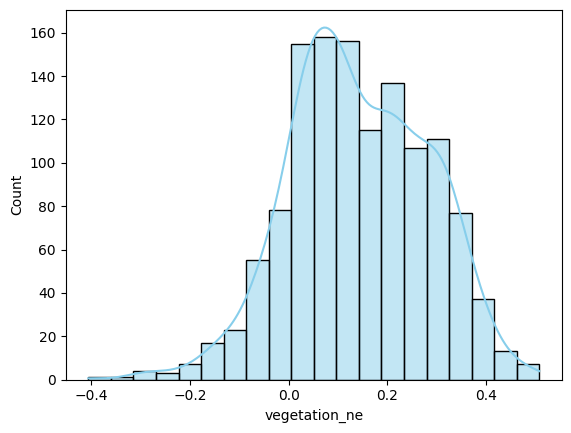

In [55]:
sns.histplot(train_df["vegetation_ne"], bins=20, kde=True, color='skyblue', edgecolor='black')

Missing values before imputation: 194
Missing values after imputation: 0


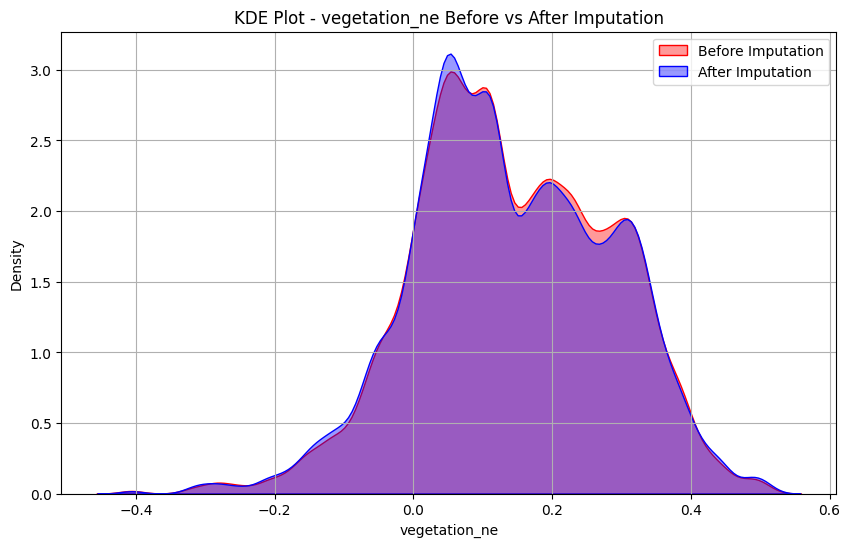

In [56]:
original = train_df['vegetation_ne'].copy()

# radom imputation
non_missing = original.dropna().values
train_df['vegetation_ne'] = original.apply(
    lambda x: np.random.choice(non_missing) if pd.isna(x) else x
)


print("Missing values before imputation:", original.isna().sum())
print("Missing values after imputation:", train_df['vegetation_ne'].isna().sum())

# KDE plot
plt.figure(figsize=(10,6))
sns.kdeplot(original, label='Before Imputation', color='red', fill=True, alpha=0.4, bw_adjust=0.5)
sns.kdeplot(train_df['vegetation_ne'], label='After Imputation', color='blue', fill=True, alpha=0.4, bw_adjust=0.5)

plt.title('KDE Plot - vegetation_ne Before vs After Imputation')
plt.xlabel('vegetation_ne')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
train_df['vegetation_nw'].describe()

,vegetation_nw
count,1404.000000
mean,0.130553
std,0.119999
min,-0.456100
25%,0.049217
50%,0.121429
75%,0.216600
max,0.454429


Missing values before imputation: 52
Missing values after imputation: 0


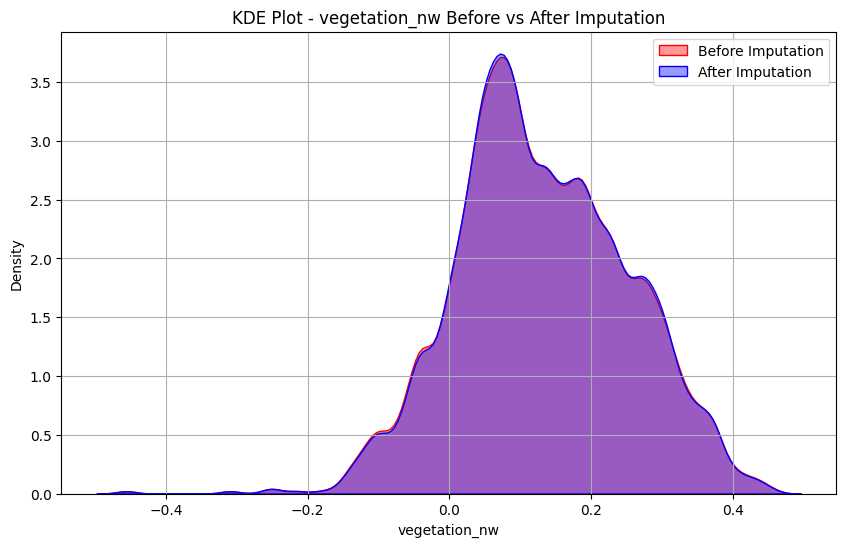

In [58]:

original = train_df['vegetation_nw'].copy()

# random imputation
non_missing = original.dropna().values
train_df['vegetation_nw'] = original.apply(
    lambda x: np.random.choice(non_missing) if pd.isna(x) else x
)

# print missing values
print("Missing values before imputation:", original.isna().sum())
print("Missing values after imputation:", train_df['vegetation_nw'].isna().sum())

# Kde plot
plt.figure(figsize=(10,6))
sns.kdeplot(original, label='Before Imputation', color='red', fill=True, alpha=0.4, bw_adjust=0.5)
sns.kdeplot(train_df['vegetation_nw'], label='After Imputation', color='blue', fill=True, alpha=0.4, bw_adjust=0.5)

plt.title('KDE Plot - vegetation_nw Before vs After Imputation')
plt.xlabel('vegetation_nw')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Missing values before imputation: 22
Missing values after imputation: 0


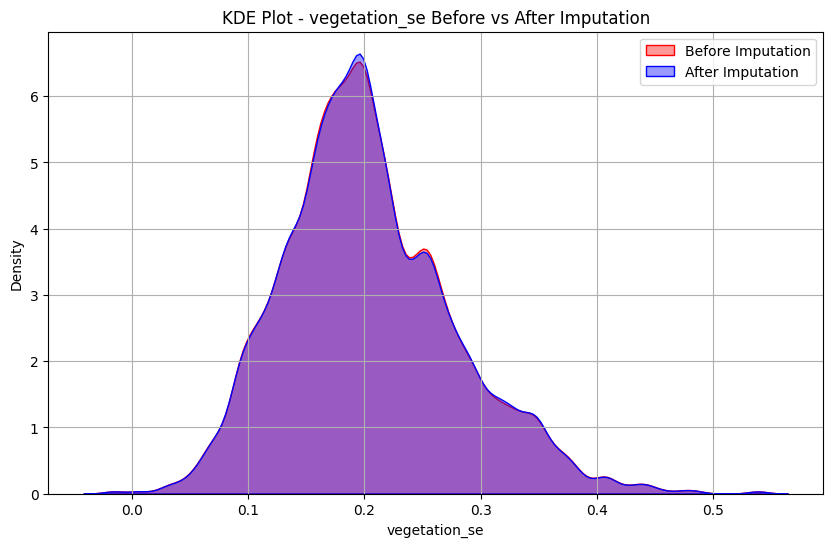

In [59]:

original = train_df['vegetation_se'].copy()

# radom imputation
non_missing = original.dropna().values
train_df['vegetation_se'] = original.apply(
    lambda x: np.random.choice(non_missing) if pd.isna(x) else x
)

# print missing values
print("Missing values before imputation:", original.isna().sum())
print("Missing values after imputation:", train_df['vegetation_se'].isna().sum())

# KDE plot
plt.figure(figsize=(10,6))
sns.kdeplot(original, label='Before Imputation', color='red', fill=True, alpha=0.4, bw_adjust=0.5)
sns.kdeplot(train_df['vegetation_se'], label='After Imputation', color='blue', fill=True, alpha=0.4, bw_adjust=0.5)

plt.title('KDE Plot - vegetation_se Before vs After Imputation')
plt.xlabel('vegetation_se')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1456 non-null   object 
 1   year                    1456 non-null   int64  
 2   weekofyear              1456 non-null   int64  
 3   week_start_date         1456 non-null   object 
 4   vegetation_ne           1456 non-null   float64
 5   vegetation_nw           1456 non-null   float64
 6   vegetation_se           1456 non-null   float64
 7   vegetation_sw           1434 non-null   float64
 8   satellite_precip_mm     1443 non-null   float64
 9   air_temp_k              1446 non-null   float64
 10  avg_temp_k              1446 non-null   float64
 11  dew_point_k             1446 non-null   float64
 12  max_air_temp_k          1446 non-null   float64
 13  min_air_temp_k          1446 non-null   float64
 14  precip_kg_per_m2        1446 non-null   

Missing values before imputation: 22
Missing values after imputation: 0


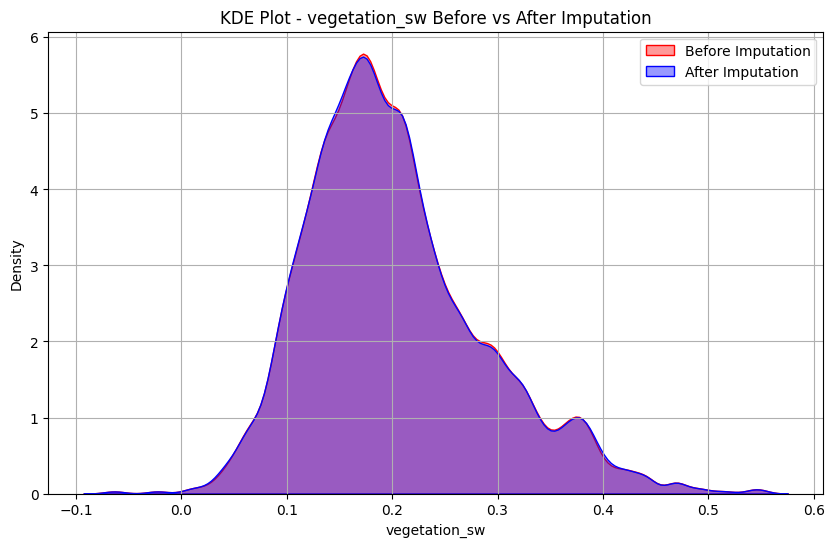

In [61]:


original = train_df['vegetation_sw'].copy()

# random imputation
non_missing = original.dropna().values
train_df['vegetation_sw'] = original.apply(
    lambda x: np.random.choice(non_missing) if pd.isna(x) else x
)

# print missing values
print("Missing values before imputation:", original.isna().sum())
print("Missing values after imputation:", train_df['vegetation_sw'].isna().sum())

# kde plot
plt.figure(figsize=(10,6))
sns.kdeplot(original, label='Before Imputation', color='red', fill=True, alpha=0.4, bw_adjust=0.5)
sns.kdeplot(train_df['vegetation_sw'], label='After Imputation', color='blue', fill=True, alpha=0.4, bw_adjust=0.5)

plt.title('KDE Plot - vegetation_sw Before vs After Imputation')
plt.xlabel('vegetation_sw')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    416 non-null    object 
 1   year                    416 non-null    int64  
 2   weekofyear              416 non-null    int64  
 3   week_start_date         416 non-null    object 
 4   vegetation_ne           373 non-null    float64
 5   vegetation_nw           405 non-null    float64
 6   vegetation_se           415 non-null    float64
 7   vegetation_sw           415 non-null    float64
 8   satellite_precip_mm     414 non-null    float64
 9   air_temp_k              414 non-null    float64
 10  avg_temp_k              414 non-null    float64
 11  dew_point_k             414 non-null    float64
 12  max_air_temp_k          414 non-null    float64
 13  min_air_temp_k          414 non-null    float64
 14  precip_kg_per_m2        414 non-null    fl

In [63]:
ndvi_cols = ['vegetation_ne', 'vegetation_nw', 'vegetation_se', 'vegetation_sw']

for col in ndvi_cols:
    #Non-missing values from training
    non_missing_values = train_df[col].dropna().values

    # Apply same random imputation to test data
    test_df[col] = test_df[col].apply(
        lambda x: np.random.choice(non_missing_values) if pd.isna(x) else x
    )
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    416 non-null    object 
 1   year                    416 non-null    int64  
 2   weekofyear              416 non-null    int64  
 3   week_start_date         416 non-null    object 
 4   vegetation_ne           416 non-null    float64
 5   vegetation_nw           416 non-null    float64
 6   vegetation_se           416 non-null    float64
 7   vegetation_sw           416 non-null    float64
 8   satellite_precip_mm     414 non-null    float64
 9   air_temp_k              414 non-null    float64
 10  avg_temp_k              414 non-null    float64
 11  dew_point_k             414 non-null    float64
 12  max_air_temp_k          414 non-null    float64
 13  min_air_temp_k          414 non-null    float64
 14  precip_kg_per_m2        414 non-null    fl

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1456 non-null   object 
 1   year                    1456 non-null   int64  
 2   weekofyear              1456 non-null   int64  
 3   week_start_date         1456 non-null   object 
 4   vegetation_ne           1456 non-null   float64
 5   vegetation_nw           1456 non-null   float64
 6   vegetation_se           1456 non-null   float64
 7   vegetation_sw           1456 non-null   float64
 8   satellite_precip_mm     1443 non-null   float64
 9   air_temp_k              1446 non-null   float64
 10  avg_temp_k              1446 non-null   float64
 11  dew_point_k             1446 non-null   float64
 12  max_air_temp_k          1446 non-null   float64
 13  min_air_temp_k          1446 non-null   float64
 14  precip_kg_per_m2        1446 non-null   

<Axes: xlabel='satellite_precip_mm', ylabel='Count'>

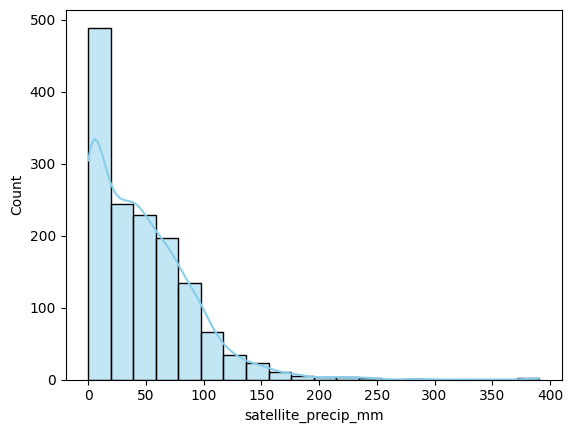

In [65]:
sns.histplot(train_df['satellite_precip_mm'], bins=20, kde=True, color='skyblue', edgecolor='black')

Missing values before imputation: 13
Missing values after imputation: 0


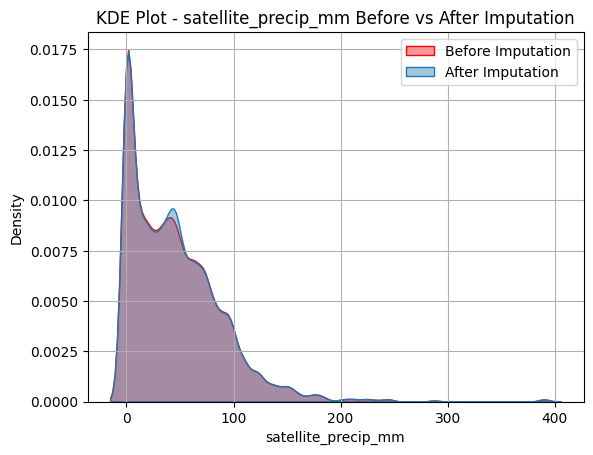

In [66]:
# KNN imputation
original = train_df['satellite_precip_mm'].copy()

imputer = KNNImputer(n_neighbors=5)
train_df[['satellite_precip_mm']] = imputer.fit_transform(train_df[['satellite_precip_mm']])
print("Missing values before imputation:", original.isna().sum())
print("Missing values after imputation:", train_df['satellite_precip_mm'].isna().sum())
# KDE Plots
sns.kdeplot(original, label='Before Imputation', color='red', fill=True, alpha=0.4, bw_adjust=0.5)
sns.kdeplot(train_df[['satellite_precip_mm']], label='After Imputation', color='blue', fill=True, alpha=0.4, bw_adjust=0.5)

plt.title('KDE Plot - satellite_precip_mm Before vs After Imputation')
plt.xlabel('satellite_precip_mm')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



In [67]:
#Apply Knn impuation to test data set
test_df[['satellite_precip_mm']] = imputer.transform(test_df[['satellite_precip_mm']])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    416 non-null    object 
 1   year                    416 non-null    int64  
 2   weekofyear              416 non-null    int64  
 3   week_start_date         416 non-null    object 
 4   vegetation_ne           416 non-null    float64
 5   vegetation_nw           416 non-null    float64
 6   vegetation_se           416 non-null    float64
 7   vegetation_sw           416 non-null    float64
 8   satellite_precip_mm     416 non-null    float64
 9   air_temp_k              414 non-null    float64
 10  avg_temp_k              414 non-null    float64
 11  dew_point_k             414 non-null    float64
 12  max_air_temp_k          414 non-null    float64
 13  min_air_temp_k          414 non-null    float64
 14  precip_kg_per_m2        414 non-null    fl

<Axes: xlabel='air_temp_k', ylabel='Count'>

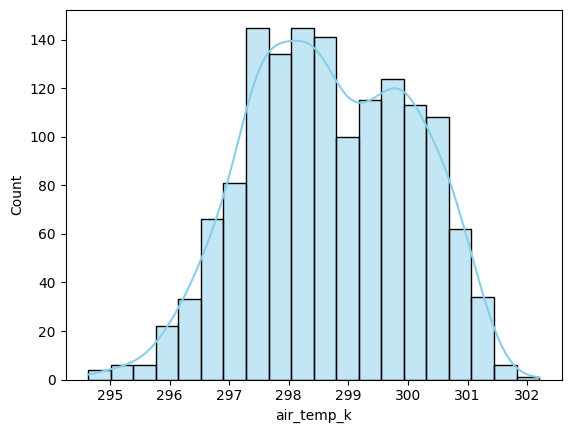

In [68]:
sns.histplot(train_df['air_temp_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='avg_temp_k', ylabel='Count'>

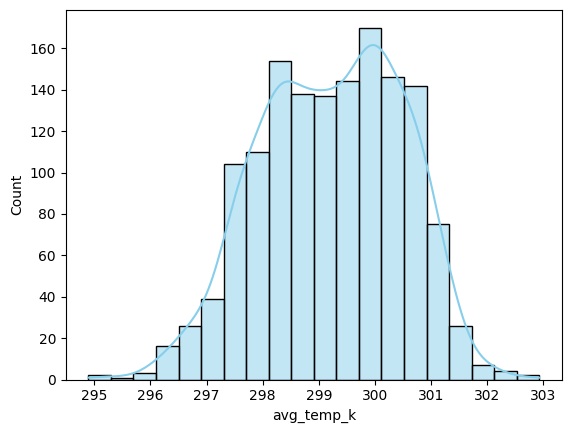

In [69]:
sns.histplot(train_df['avg_temp_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='dew_point_k', ylabel='Count'>

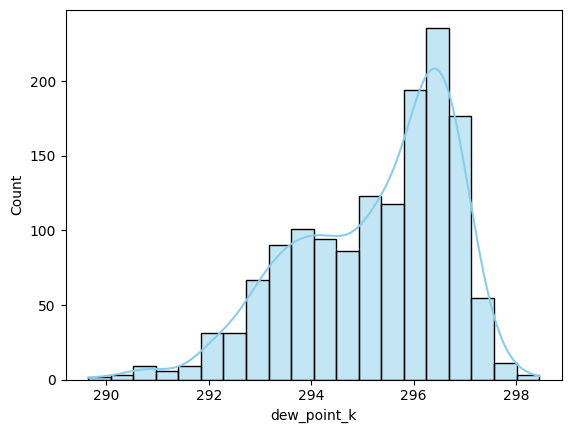

In [70]:
sns.histplot(train_df['dew_point_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='max_air_temp_k', ylabel='Count'>

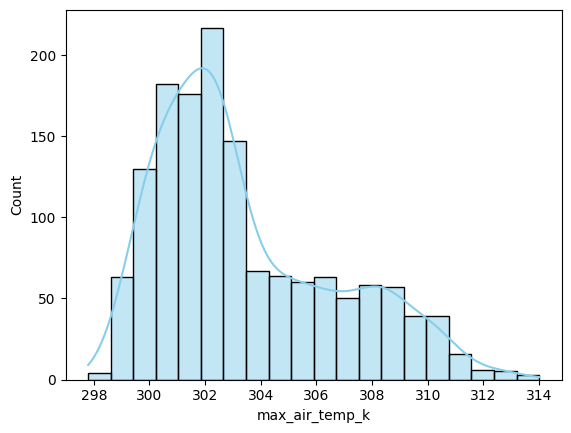

In [71]:
sns.histplot(train_df['max_air_temp_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='min_air_temp_k', ylabel='Count'>

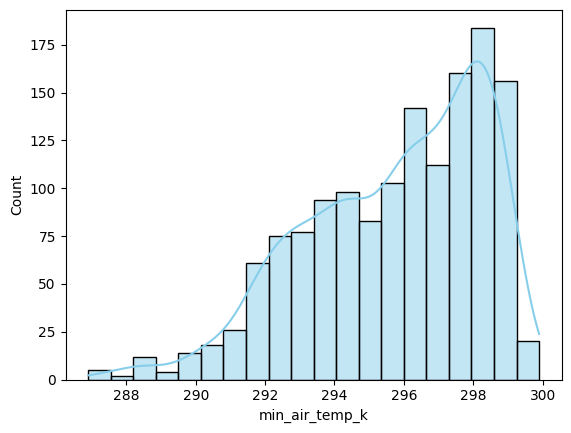

In [72]:
sns.histplot(train_df['min_air_temp_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='precip_kg_per_m2', ylabel='Count'>

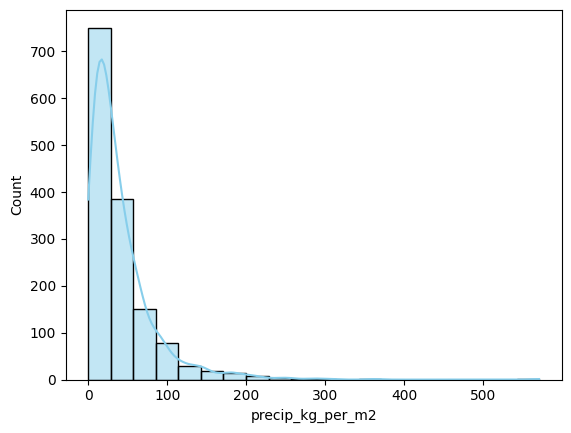

In [73]:
sns.histplot(train_df['precip_kg_per_m2'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='humidity_percent', ylabel='Count'>

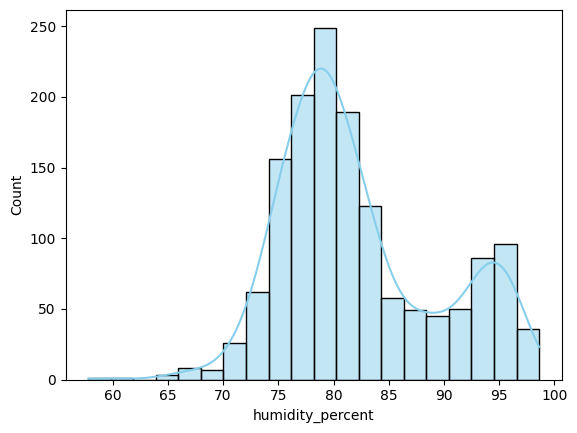

In [74]:
sns.histplot(train_df['humidity_percent'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='temp_range_k', ylabel='Count'>

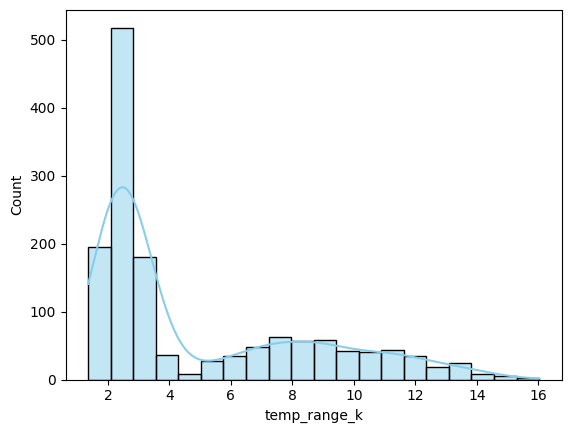

In [75]:
sns.histplot(train_df['temp_range_k'], bins=20, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='specific_humidity', ylabel='Count'>

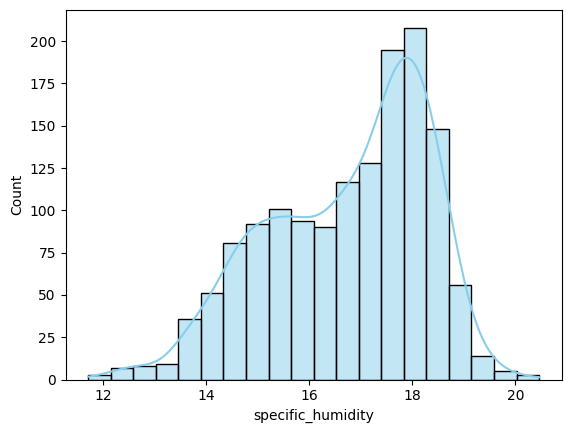

In [76]:
sns.histplot(train_df['specific_humidity'], bins=20, kde=True, color='skyblue', edgecolor='black')

In [77]:
from sklearn.impute import SimpleImputer
# apply median transformation
cols = [
    'air_temp_k', 'avg_temp_k', 'dew_point_k', 'max_air_temp_k',
    'min_air_temp_k', 'precip_kg_per_m2', 'humidity_percent', 'temp_range_k', 'specific_humidity'
]

imputer = SimpleImputer(strategy='median')

train_df[cols] = imputer.fit_transform(train_df[cols])
test_df[cols] = imputer.transform(test_df[cols])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    416 non-null    object 
 1   year                    416 non-null    int64  
 2   weekofyear              416 non-null    int64  
 3   week_start_date         416 non-null    object 
 4   vegetation_ne           416 non-null    float64
 5   vegetation_nw           416 non-null    float64
 6   vegetation_se           416 non-null    float64
 7   vegetation_sw           416 non-null    float64
 8   satellite_precip_mm     416 non-null    float64
 9   air_temp_k              416 non-null    float64
 10  avg_temp_k              416 non-null    float64
 11  dew_point_k             416 non-null    float64
 12  max_air_temp_k          416 non-null    float64
 13  min_air_temp_k          416 non-null    float64
 14  precip_kg_per_m2        416 non-null    fl

<Axes: xlabel='re_satellite_precip_mm', ylabel='Count'>

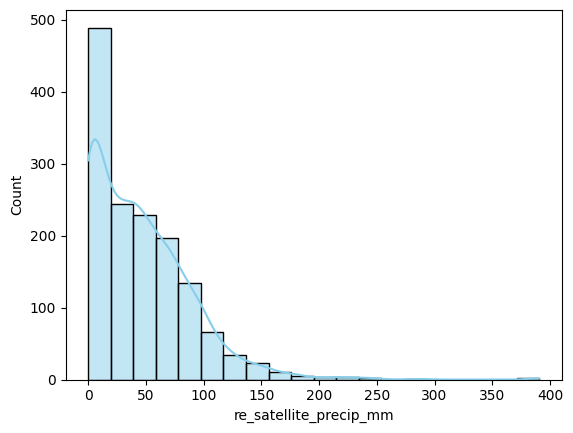

In [78]:
sns.histplot(train_df['re_satellite_precip_mm'], bins=20, kde=True, color='skyblue', edgecolor='black')

In [79]:
#median Imputaion
imputer = SimpleImputer(strategy='median')
train_df[['re_satellite_precip_mm']] = imputer.fit_transform(train_df[['re_satellite_precip_mm']])
test_df[['re_satellite_precip_mm']] = imputer.transform(test_df[['re_satellite_precip_mm']])

In [80]:
#median Imputaion
weather_cols = [
    'station_avg_temp',
    'station_temp_range',
    'station_max_temp',
    'station_min_temp',
    'station_precip_mm'
]

median_values = train_df[weather_cols].median()

train_df[weather_cols] = train_df[weather_cols].fillna(median_values)
test_df[weather_cols] = test_df[weather_cols].fillna(median_values)


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    416 non-null    object 
 1   year                    416 non-null    int64  
 2   weekofyear              416 non-null    int64  
 3   week_start_date         416 non-null    object 
 4   vegetation_ne           416 non-null    float64
 5   vegetation_nw           416 non-null    float64
 6   vegetation_se           416 non-null    float64
 7   vegetation_sw           416 non-null    float64
 8   satellite_precip_mm     416 non-null    float64
 9   air_temp_k              416 non-null    float64
 10  avg_temp_k              416 non-null    float64
 11  dew_point_k             416 non-null    float64
 12  max_air_temp_k          416 non-null    float64
 13  min_air_temp_k          416 non-null    float64
 14  precip_kg_per_m2        416 non-null    fl

# **Insights**

1. Handle missing values for both training and testing data using random , KNN or median.
2. Random imputation for those column whose correlation is week and missing values are less than 5%.
3. KNN imputation for those feature that has MAR missing values that depends on other column.
4. Median imputation for skewed columns.
5. kde plot show distribution before and after imputation.

In [82]:
city_mapping = {'sj': 0, 'iq': 1}

train_df['city'] = train_df['city'].map(city_mapping)

In [83]:
# download train data as csvafter handlng missing values
from google.colab import files
train_df.to_csv('train_df.csv', index=False)
files.download('train_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# download train data as csvafter handlng missing values
test_df.to_csv('test_df.csv', index=False)
files.download('test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Insights**

1. Map cities in city feature to 0 and 1 for model training
2. Download both train and test for other preprocessing and model training and evaluation.
